In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
os.chdir('C:\\College\\Machine Learnings\\Part 4 - Clustering\\Section 24 - K-Means Clustering')
%matplotlib inline
plt.rcParams['figure.figsize'] = 9,8

In [2]:
mall_dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
mall_dataset.tail(n=1)
mall_dataset.columns=['CustomerID','Genre','Age','AnnualIncome','SpendingScore']

In [4]:
mall_dataset.info()
#### No such categorical variable found ################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID       200 non-null int64
Genre            200 non-null object
Age              200 non-null int64
AnnualIncome     200 non-null int64
SpendingScore    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
### Missing values in our dataset ##########################
mall_dataset[mall_dataset['CustomerID'].isna()]
mall_dataset[mall_dataset['Genre'].isna()]
mall_dataset[mall_dataset['Age'].isna()]
mall_dataset[mall_dataset['AnnualIncome'].isna()]
mall_dataset[mall_dataset['SpendingScore'].isna()]
### No missing values 

,CustomerID,Genre,Age,AnnualIncome,SpendingScore


In [6]:
## Create X 
### There is no dependent values
X = mall_dataset.iloc[:,3:5].values

In [7]:
### Create train and test dataset
from sklearn.cross_validation import train_test_split
X_train,X_test = train_test_split(X,test_size=0.25)

C:\Users\PuneetPC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
### Create standard scaler 
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
### Find no of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=0,init='k-means++',max_iter=400,n_jobs=-1,n_init=15)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [19]:
k_means =KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,n_jobs=-1,random_state=0)
y_pred= k_means.fit_predict(X)

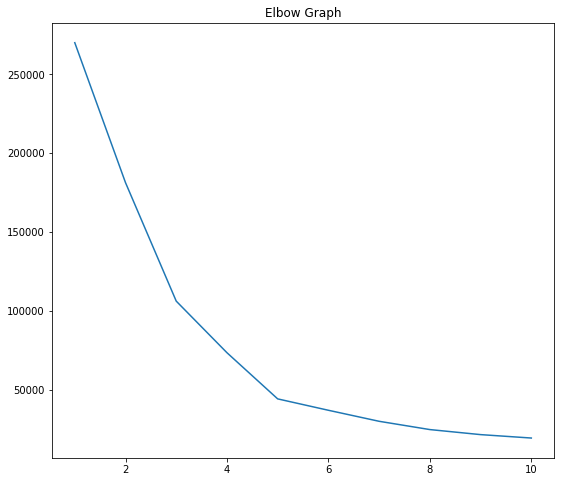

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Graph")
plt.show()

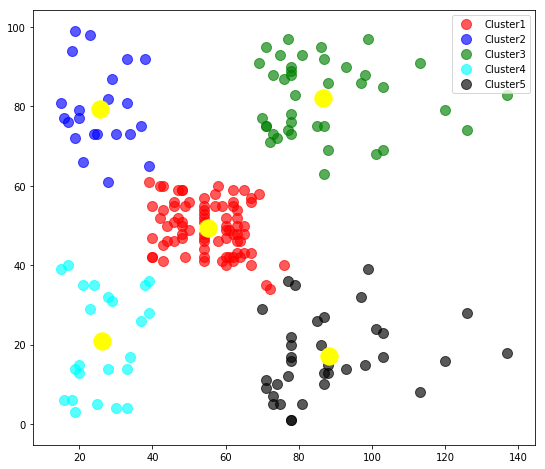

In [21]:
### Visualizing the clusters
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.legend()
plt.show()

In [22]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])